In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CLASS_NUM = 5
DATA_PATH= 'drive/My Drive/AI_CTE/'
WIDTH = 256
HEIGHT = 256
CHANNEL = 3
EPOCHS = 50
BATCH_SIZE = 150

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    DATA_PATH+'train/',
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
        shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    DATA_PATH+'test/',
    target_size = (HEIGHT, WIDTH),
    batch_size = BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

Found 1436 images belonging to 5 classes.
Found 360 images belonging to 5 classes.


## Visualizing Training Images

In [ ]:
#next function returns two two output x_train and y_train
sample_training_images, _ = next(train_generator)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

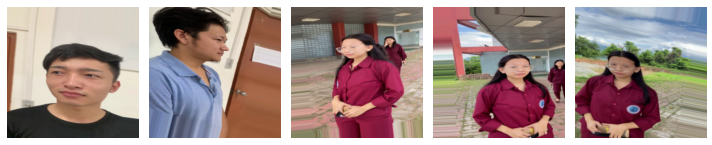

In [ ]:
plotImages(sample_training_images[:5])

#CNN 16 3x3 filters

In [ ]:
# # VGG16 Style Architecture
model = tf.keras.Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(HEIGHT, WIDTH, CHANNEL), activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASS_NUM, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      25632     
                                                                 
 batch_normalization_6 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 126, 126, 64)     

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
checkpoint = ModelCheckpoint(filepath, monitor = ['val_accuracy'], verbose = 1  , mode = 'max')
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks_list = [checkpoint, sheduler_lr]

# Steps
SPE = len(train_generator)
VS = len(test_generator)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = SPE,
    validation_data = test_generator,
    validation_steps = VS,
    epochs = EPOCHS,
    callbacks = callbacks_list
)

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 33.0296 - accuracy: 0.6748
Epoch 1: saving model to weights-improvement-01-0.09.h5
10/10 [==============================] - 64s 5s/step - loss: 33.0296 - accuracy: 0.6748 - val_loss: 40.3362 - val_accuracy: 0.0917 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.9819
Epoch 2: saving model to weights-improvement-02-0.11.h5
10/10 [==============================] - 30s 3s/step - loss: 0.5937 - accuracy: 0.9819 - val_loss: 110.4446 - val_accuracy: 0.1083 - lr: 9.0000e-04
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.9854
Epoch 3: saving model to weights-improvement-03-0.12.h5
10/10 [==============================] - 30s 3s/step - loss: 0.4521 - accuracy: 0.9854 - val_loss: 144.1750 - val_accuracy: 0.1222 - lr: 8.1000e-04
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.9965
Epoch 4: saving

In [ ]:
# Test Accuracy
scores = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

3/3 [==============================] - 1s 248ms/step - loss: 2.4119 - accuracy: 0.8028
Test Accuracy: 80.28%


In [ ]:
# Train Accuracy
scores = model.evaluate(train_generator, steps=len(train_generator), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

10/10 [==============================] - 5s 544ms/step - loss: 2.3104 - accuracy: 0.7772
Train Accuracy: 77.72%


In [ ]:
len(train_generator)

10

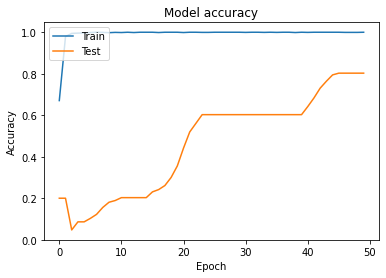

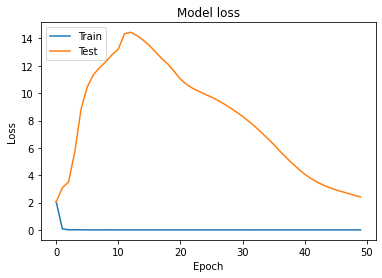

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

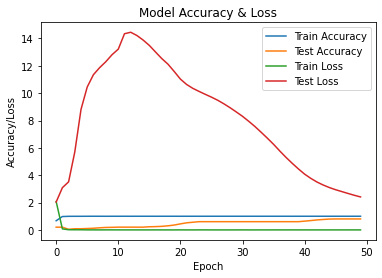

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'])
plt.show()

# Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], loc='upper left')
# plt.show()
#loc='upper left'

In [ ]:
classes = test_generator.class_indices
print(classes)

{'Kamlu-opencv': 0, 'Prime-opencv': 1, 'Rigden-opencv': 2, 'Tashi-opencv': 3, 'Tim-opencv': 4}


## Confusion Matrix for Testing

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[72  0  0  0  0]
 [ 0  0 71  0  0]
 [ 0  0 72  0  0]
 [ 0  0  0 72  0]
 [ 0  0  0  0 73]]
Classification Report
              precision    recall  f1-score   support

        Zero       1.00      1.00      1.00        72
         One       0.00      0.00      0.00        71
         Two       0.50      1.00      0.67        72
       Three       1.00      1.00      1.00        72
        Four       1.00      1.00      1.00        73

    accuracy                           0.80       360
   macro avg       0.70      0.80      0.73       360
weighted avg       0.70      0.80      0.74       360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Text(0.5, 1.0, 'Confusion Matrix')

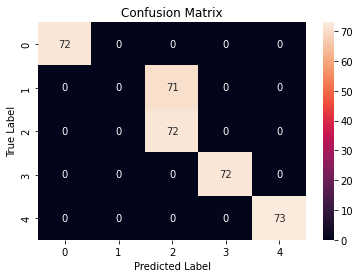

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
matrix = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Text(0.5, 1.0, 'Confusion Matrix')

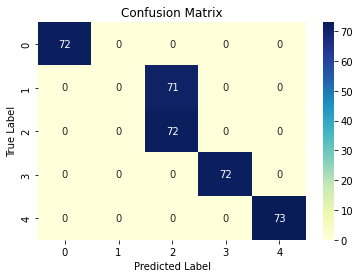

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
matrix = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')